In [23]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


from network_handler import network_handler
from person import Person
from disease_propagator import Disease_Propagator

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# Parameters
population_size = 1000
average_degree = 5
random_edge_probability = 0.3

time_limit = 1000
unit_time = population_size # number of simulation steps that make up one time step


time_until_quarantine = {
    'mean': 4,
    'std_dev': 2
}

time_until_recovery = 10 # make distribution later

p = 0.1 # Factor for probability to become infected in public

In [31]:
population_IDs = range(population_size)

# Network
# Degrees ranging from 3 to 10
# Clustering coefficient: between 0.15 and 0.2 
# Average shortest path length around 6
# -> Typical for social networks [Networks: An Introduction by Newman, my google sheet]
network = network_handler(population_size,average_degree,random_edge_probability)

# Population dictionary
# {ID: Person}
population = network._population
    
network.number_of_nodes()

1000

In [32]:

# Initialize compartment ID lists
S = list(population.keys()) # Susceptibles
first_infected = random.choice(list(population.values()))
first_infected.time_to_quarantine = np.random.normal(time_until_quarantine['mean'], time_until_quarantine['std_dev'])
I = [first_infected.ID] # Infectious
S.remove(first_infected.ID)
Q = [] # Quarantined



In [33]:
disease = Disease_Propagator(time_limit,
                             time_until_quarantine['mean'],
                             time_until_quarantine['std_dev'])
S_t, I_t = disease.simulate(network, S, I, Q, time_until_recovery, p)


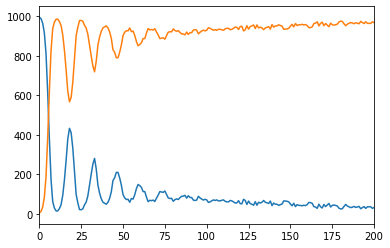

In [41]:
time_range = np.arange(0, time_limit, 1)
plt.xlim(0,200)
plt.plot(time_range, S_t)
plt.plot(time_range, I_t)